### Instalação de Dependências

Neste passo, instalamos a biblioteca `scikeras`, que serve como uma ponte entre o Keras (para redes neurais) e o scikit-learn (para ferramentas clássicas de machine learning). Isso permite, por exemplo, usar validadores cruzados e pipelines do scikit-learn com modelos construídos em Keras.


In [ ]:
pip install scikeras

### Importação de Bibliotecas

Importamos bibliotecas essenciais como `requests` (requisições HTTP), `os` (operações com arquivos e diretórios), `shutil` (movimentação e cópia de arquivos), e `tqdm` (exibição de barras de progresso). Elas são usadas para baixar, organizar e visualizar o progresso de manipulação dos dados.


In [ ]:
import requests
import os
from tqdm import tqdm
import shutil
import matplotlib.pyplot as plt

## Escolha das raças para treinamento

### Seleção das Raças

Aqui, definimos uma lista de raças de cães que serão utilizadas como classes para o modelo. Cada item desta lista representa uma classe que o modelo deverá aprender a reconhecer em imagens.


In [ ]:
breeds = [
    "affenpinscher", "african", "airedale", "akita", "appenzeller",
    "australian", "bakharwal", "basenji", "beagle", "bluetick", "borzoi",
    "bouvier", "boxer", "brabancon", "briard", "buhund", "bulldog",
    "bullterrier", "cattledog", "cavapoo", "chihuahua", "chippiparai",
    "chow", "clumber", "cockapoo", "collie", "coonhound", "corgi",
    "cotondetulear", "dachshund", "dalmatian", "dane", "danish",
    "deerhound", "dhole", "dingo", "doberman", "elkhound", "entlebucher",
    "eskimo", "finnish", "frise", "gaddi", "germanshepherd", "greyhound",
    "groenendael", "havanese", "hound", "husky", "keeshond", "kelpie",
    "kombai", "komondor", "kuvasz", "labradoodle", "labrador", "leonberg",
    "lhasa", "malamute", "malinois", "maltese", "mastiff",
    "mexicanhairless", "mix", "mountain", "mudhol", "newfoundland",
    "otterhound", "ovcharka", "papillon", "pariah", "pekinese",
    "pembroke", "pinscher", "pitbull", "pointer", "pomeranian", "poodle",
    "pug", "puggle", "pyrenees", "rajapalayam", "redbone", "retriever",
    "ridgeback", "rottweiler", "saluki", "samoyed", "schipperke",
    "schnauzer", "segugio", "setter", "sharpei", "sheepdog", "shiba",
    "shihtzu", "spaniel", "spitz", "springer", "stbernard", "terrier",
    "tervuren", "vizsla", "waterdog", "weimaraner", "whippet",
    "wolfhound"
]

breed_image_counts = {}

for breed in breeds:
    url = f"https://dog.ceo/api/breed/{breed}/images"
    response = requests.get(url).json()
    if response["status"] == "success":
        breed_image_counts[breed] = len(response["message"])

print(breed_image_counts)

{'affenpinscher': 134, 'african': 169, 'airedale': 189, 'akita': 7, 'appenzeller': 135, 'australian': 13, 'bakharwal': 1, 'basenji': 170, 'beagle': 172, 'bluetick': 147, 'borzoi': 107, 'bouvier': 119, 'boxer': 149, 'brabancon': 141, 'briard': 136, 'buhund': 3, 'bulldog': 324, 'bullterrier': 132, 'cattledog': 18, 'cavapoo': 5, 'chihuahua': 129, 'chippiparai': 1, 'chow': 183, 'clumber': 116, 'cockapoo': 16, 'collie': 299, 'coonhound': 130, 'corgi': 139, 'cotondetulear': 4, 'dachshund': 31, 'dalmatian': 2, 'dane': 127, 'danish': 4, 'deerhound': 140, 'dhole': 150, 'dingo': 148, 'doberman': 137, 'elkhound': 175, 'entlebucher': 200, 'eskimo': 140, 'finnish': 2, 'frise': 11, 'gaddi': 1, 'germanshepherd': 136, 'greyhound': 144, 'groenendael': 126, 'havanese': 5, 'hound': 808, 'husky': 189, 'keeshond': 135, 'kelpie': 147, 'kombai': 1, 'komondor': 101, 'kuvasz': 133, 'labradoodle': 3, 'labrador': 184, 'leonberg': 113, 'lhasa': 166, 'malamute': 136, 'malinois': 136, 'maltese': 225, 'mastiff': 268

In [ ]:
sorted_counts = dict(sorted(breed_image_counts.items(), key=lambda item: item[1], reverse=True))
print(sorted_counts)

{'spaniel': 1000, 'terrier': 1000, 'hound': 808, 'retriever': 585, 'poodle': 421, 'schnauzer': 420, 'setter': 419, 'bulldog': 324, 'mountain': 315, 'collie': 299, 'sheepdog': 284, 'mastiff': 268, 'pug': 230, 'maltese': 225, 'pinscher': 206, 'entlebucher': 200, 'shihtzu': 198, 'pomeranian': 194, 'airedale': 189, 'husky': 189, 'labrador': 184, 'papillon': 184, 'chow': 183, 'elkhound': 175, 'beagle': 172, 'basenji': 170, 'african': 169, 'samoyed': 168, 'lhasa': 166, 'whippet': 162, 'pyrenees': 159, 'pembroke': 158, 'newfoundland': 154, 'ridgeback': 151, 'dhole': 150, 'springer': 150, 'boxer': 149, 'dingo': 148, 'saluki': 148, 'bluetick': 147, 'kelpie': 147, 'mix': 146, 'greyhound': 144, 'mexicanhairless': 144, 'weimaraner': 143, 'brabancon': 141, 'deerhound': 140, 'eskimo': 140, 'corgi': 139, 'rottweiler': 139, 'stbernard': 139, 'pointer': 138, 'doberman': 137, 'briard': 136, 'germanshepherd': 136, 'malamute': 136, 'malinois': 136, 'appenzeller': 135, 'keeshond': 135, 'wolfhound': 135, 'a

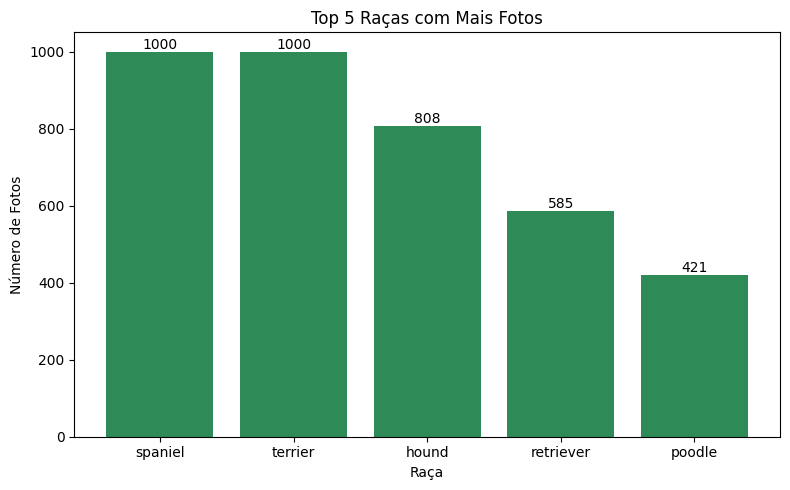

In [ ]:
top5 = dict(sorted(sorted_counts.items(), key=lambda x: x[1], reverse=True)[:5])

plt.figure(figsize=(8, 5))
bars = plt.bar(top5.keys(), top5.values(), color='seagreen')
plt.bar_label(bars)
plt.title('Top 5 Raças com Mais Fotos')
plt.ylabel('Número de Fotos')
plt.xlabel('Raça')
plt.tight_layout()
plt.show()

### Função para Obter Sub-Raças

Esta função utiliza a API pública do Dog CEO para coletar sub-raças de uma raça principal. Isso nos ajuda a entender melhor a hierarquia das raças e a estruturar o dataset de forma mais completa.


In [ ]:
def get_subbreeds(breed):
    url = f"https://dog.ceo/api/breed/{breed}/list"
    response = requests.get(url).json()
    return response["message"]

def get_image_urls(breed, sub_breed):
    url = f"https://dog.ceo/api/breed/{breed}/{sub_breed}/images"
    response = requests.get(url).json()
    return response["message"]

def download_images(image_urls, folder):
    os.makedirs(folder, exist_ok=True)
    for i, url in enumerate(tqdm(image_urls, desc=f"Downloading to {folder}")):
        try:
            img_data = requests.get(url).content
            with open(os.path.join(folder, f"{i}.jpg"), "wb") as handler:
                handler.write(img_data)
        except Exception as e:
            print(f"Erro ao baixar {url}: {e}")

breeds = ["hound", "retriever", "terrier", "spaniel"]

for breed in breeds:
    subbreeds = get_subbreeds(breed)
    for sub in subbreeds:
        print(f"Baixando imagens de: {breed} - {sub}")
        image_urls = get_image_urls(breed, sub)
        download_images(image_urls, folder=f"dataset/{breed}_{sub}")


Baixando imagens de: hound - afghan


Baixando imagens de: hound - basset


Baixando imagens de: hound - blood


Baixando imagens de: hound - english


Baixando imagens de: hound - ibizan


Baixando imagens de: hound - plott


Baixando imagens de: hound - walker


Baixando imagens de: retriever - chesapeake


Baixando imagens de: retriever - curly


Baixando imagens de: retriever - flatcoated


Baixando imagens de: retriever - golden


Baixando imagens de: terrier - american


Baixando imagens de: terrier - australian


Baixando imagens de: terrier - bedlington


Baixando imagens de: terrier - border


Baixando imagens de: terrier - cairn


Baixando imagens de: terrier - dandie


Baixando imagens de: terrier - fox


Baixando imagens de: terrier - irish


Baixando imagens de: terrier - kerryblue


Baixando imagens de: terrier - lakeland


Baixando imagens de: terrier - norfolk


Baixando imagens de: terrier - norwich


Baixando imagens de: terrier - patterdale


Baixando imagens de: terrier - russell


Baixando imagens de: terrier - scottish


Baixando imagens de: terrier - sealyham


Baixando imagens de: terrier - silky


Baixando imagens de: terrier - tibetan


Baixando imagens de: terrier - toy


Baixando imagens de: terrier - welsh


Baixando imagens de: terrier - westhighland


Baixando imagens de: terrier - wheaten


Baixando imagens de: terrier - yorkshire


Baixando imagens de: spaniel - blenheim


Baixando imagens de: spaniel - brittany


Baixando imagens de: spaniel - cocker


Baixando imagens de: spaniel - irish


Baixando imagens de: spaniel - japanese


Baixando imagens de: spaniel - sussex


Baixando imagens de: spaniel - welsh


### Definição de Caminhos e Grupos

Especificamos o diretório base onde os dados serão salvos e organizamos as raças em grupos maiores (como 'hound', 'retriever', etc.). Isso pode ser útil tanto para organização quanto para análises futuras baseadas em categorias genéricas.


In [ ]:
base_path = r"/content/dataset"
groups = ["hound", "retriever", "spaniel", "terrier"]
output_base = "C:/dataset_merged"

os.makedirs(output_base, exist_ok=True)

for group in groups:
    print(f"Processando grupo: {group}")
    group_path = os.path.join(base_path, group)
    output_group_path = os.path.join(output_base, group)
    os.makedirs(output_group_path, exist_ok=True)
    sub_breeds = [d for d in os.listdir(group_path) if os.path.isdir(os.path.join(group_path, d))]

    for sub_breed in sub_breeds:
        sub_breed_path = os.path.join(group_path, sub_breed)
        for filename in os.listdir(sub_breed_path):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                old_file_path = os.path.join(sub_breed_path, filename)
                base_name, ext = os.path.splitext(filename)
                new_filename = f"{sub_breed}_{base_name}{ext}"
                new_file_path = os.path.join(output_group_path, new_filename)


                count = 1
                while os.path.exists(new_file_path):
                    new_filename = f"{sub_breed}_{base_name}_{count}{ext}"
                    new_file_path = os.path.join(output_group_path, new_filename)
                    count += 1

                shutil.move(old_file_path, new_file_path)

        try:
            os.rmdir(sub_breed_path)
        except OSError:
            print(f"Não foi possível remover a pasta (não está vazia): {sub_breed_path}")

    print(f"Grupo {group} processado. Arquivos movidos para: {output_group_path}")

print("Movimentação concluída!")


Processando grupo: hound
Grupo hound processado. Arquivos movidos para: C:/dataset_merged/hound
Processando grupo: retriever
Grupo retriever processado. Arquivos movidos para: C:/dataset_merged/retriever
Processando grupo: spaniel
Grupo spaniel processado. Arquivos movidos para: C:/dataset_merged/spaniel
Processando grupo: terrier
Não foi possível remover a pasta (não está vazia): /content/dataset/terrier/terrier_silky
Grupo terrier processado. Arquivos movidos para: C:/dataset_merged/terrier
Movimentação concluída!


## Tratamentos e ajustes

### Importações para Pré-processamento e Modelagem

Importamos `numpy` para cálculos numéricos, `matplotlib` para visualizações gráficas e `tensorflow` (com Keras) para construção e treinamento dos modelos de deep learning. Também carregamos utilitários de manipulação de imagens.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from itertools import product
import pandas as pd
from sklearn.metrics import confusion_matrix

print("TensorFlow Version:", tf.__version__)
print("GPUs detectadas:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.18.0
GPUs detectadas: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Parâmetros de Configuração de Imagens

Configuramos o caminho do diretório com os dados e os parâmetros padrão para as imagens de entrada (altura e largura). O redimensionamento padronizado é crucial para que o modelo aceite as imagens como entrada com a mesma estrutura dimensional.


In [ ]:
#fazer isso pro retriver, flipar as 585 fotos pra duplicar a quantidade de fotos indo pra 1170

from PIL import Image
import os

input_dir = "/content/C:/dataset_merged/retriever"
output_dir = "/content/C:/dataset_merged/retriever"

os.makedirs(output_dir, exist_ok=True)

image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(input_dir, img_file)
    img = Image.open(img_path)

    flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)

    output_path = os.path.join(output_dir, f"flipped_{img_file}")
    flipped_img.save(output_path)

print(f"{len(image_files)} imagens flipadas e salvas em {output_dir}!")

585 imagens flipadas e salvas em /content/C:/dataset_merged/retriever!


In [ ]:
dataset_dir = r'/content/C:/dataset_merged'

#parâmetros
img_height = 150
img_width = 150
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print("Classes:", train_generator.class_indices)

Found 4876 images belonging to 4 classes.
Found 1217 images belonging to 4 classes.
Classes: {'hound': 0, 'retriever': 1, 'spaniel': 2, 'terrier': 3}


### Construção da Rede Neural Convolucional (CNN)

Nesta célula é construída uma rede neural convolucional utilizando o modelo `Sequential` do Keras. A arquitetura normalmente inclui camadas convolucionais para extração de características visuais, camadas de pooling para redução de dimensionalidade, e camadas densas para classificação. O objetivo é permitir que o modelo aprenda padrões relevantes nas imagens para diferenciar entre as raças de cães.


In [ ]:
def cnn(optimizer='adam', dropout_rate=0.3):
    model = models.Sequential()

    # bloco 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # bloco 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # bloco 3 - mais filtros
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten e FC
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

### Treinamento do Modelo com os Dados

Aqui o modelo é treinado utilizando os dados de treinamento. Durante cada época, o modelo ajusta seus pesos para minimizar o erro na classificação. Também são avaliados os dados de validação para monitorar o desempenho em dados que o modelo não viu durante o ajuste.


In [ ]:
model = cnn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#treinamento
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 120ms/step - accuracy: 0.4079 - loss: 3.6825 - val_accuracy: 0.4766 - val_loss: 8.6896
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5051 - loss: 1.2747 - val_accuracy: 0.5086 - val_loss: 1.3495
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5287 - loss: 1.1660 - val_accuracy: 0.5127 - val_loss: 1.4003
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5241 - loss: 1.1520 - val_accuracy: 0.4371 - val_loss: 1.5748
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5393 - loss: 1.1218 - val_accuracy: 0.5267 - val_loss: 1.2223
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.5361 - loss: 1.0617 - val_accuracy: 0.5168 - val_loss: 1.2055
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.5556 - loss: 1.0376 - val_accuracy: 0.5390 - val_loss: 1.2102
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.5440 - loss: 1.0096 -

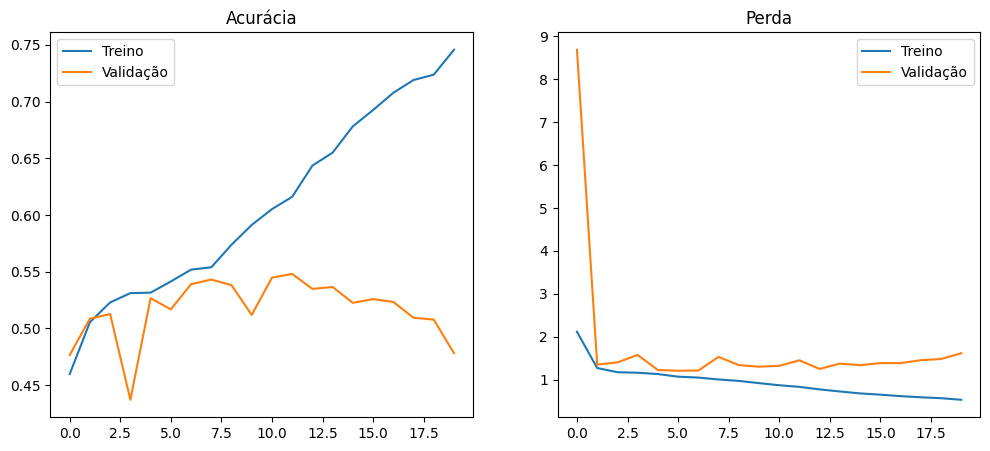

In [ ]:
plt.figure(figsize=(12, 5))

#acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()

#perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.legend()

plt.show()


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


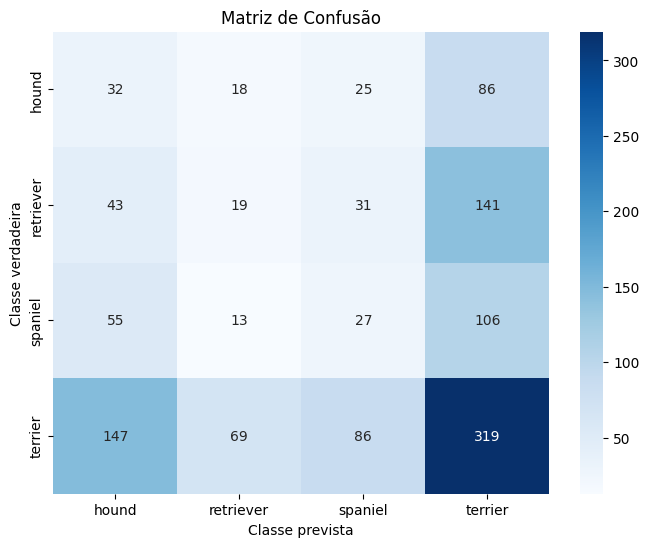

              precision    recall  f1-score   support

       hound       0.12      0.20      0.15       161
   retriever       0.16      0.08      0.11       234
     spaniel       0.16      0.13      0.15       201
     terrier       0.49      0.51      0.50       621

    accuracy                           0.33      1217
   macro avg       0.23      0.23      0.23      1217
weighted avg       0.32      0.33      0.32      1217



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: obter previsões no conjunto de validação
val_generator.reset()  # Garante que o gerador comece do início
pred_probs = model.predict(val_generator, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)  # converte para rótulos de classe

# Passo 2: obter os rótulos verdadeiros
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())  # nomes das classes

# Passo 3: gerar matriz de confusão
cm = confusion_matrix(true_classes, pred_classes)

# Passo 4: plotar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Classe prevista')
plt.ylabel('Classe verdadeira')
plt.title('Matriz de Confusão')
plt.show()

# Relatório detalhado (precisão, recall, f1-score)
print(classification_report(true_classes, pred_classes, target_names=class_labels))


Observa-se que a classe terrier teve o melhor desempenho, com 319 classificações corretas, embora ainda tenha sido confundida com outras classes, principalmente hound (147 vezes). Já as classes retriever e spaniel apresentam maior taxa de erro, sendo frequentemente confundidas entre si e com terrier. Isso indica que o modelo teve dificuldade em distinguir corretamente entre algumas raças, sugerindo que há espaço para melhoria no treinamento ou na qualidade dos dados.

##Gráfico da Acurácia
A acurácia de treino (linha azul) aumenta rapidamente nas primeiras épocas, estabilizando por volta de 0.565.

Isso significa que :

*   O modelo está aprendendo rapidamente nas primeiras épocas.
*   Após a 2ª ou 3ª época, tanto o treino quanto a validação apresentam acurácias similares, o que indica que não há overfitting evidente.  O modelo generaliza bem para dados fora do treino.



##Gráfico da Perda (direita)
A perda de validação começa muito alta (cerca de 16) na primeira época, o que indica uma grande discrepância entre a previsão e os dados reais.

Já na segunda época, a perda de validação cai drasticamente e se estabiliza por volta de 1.2.

A perda de treino também cai rapidamente e se estabiliza num valor semelhante ao da validação.

O que isso significa:
*   A alta perda inicial de validação pode indicar má inicialização dos pesos ou dados de validação mais complexos.
*   A rápida queda e estabilização das perdas indicam que o modelo conseguiu aprender bem rapidamente e converge de forma estável.
*   Como as curvas de treino e validação são semelhantes e estáveis, o modelo aparenta estar bem ajustado, sem sinais de underfitting nem overfitting.


#Conclusão
O treinamento foi bem-sucedido:


*   O modelo aprendeu de forma rápida e eficiente.
*   Não houve overfitting significativo.
*   Tanto a acurácia quanto a perda se estabilizaram cedo, sugerindo que mais épocas provavelmente não trariam grandes melhorias.


In [ ]:
params = {
    'filters': [[32, 64], [64, 128]],
    'kernel_size': [(5, 5), (10, 10)],
    'dropout_rate': [0.3, 0.5],
    'learning_rate': [0.001, 0.0001],
    'dense_units': [64, 128]
}

In [ ]:
from tensorflow.keras import models, layers, optimizers
from itertools import product
import pandas as pd

resultados = []

combinacao = list(product(
    params['filters'],
    params['kernel_size'],
    params['dropout_rate'],
    params['learning_rate'],
    params['dense_units']
))

for filters, kernel_size, dropout_rate, learning_rate, dense_units in combinacao:
    print(f"treinando... filtros={filters}, kernel={kernel_size}, dropout={dropout_rate}, learning_rate={learning_rate}, dense_units={dense_units}")

    model = models.Sequential()
    for i, f in enumerate(filters):
        if i == 0:
            model.add(layers.Conv2D(f, kernel_size, activation='relu', input_shape=(img_height, img_width, 3), padding='same'))
        else:
            model.add(layers.Conv2D(f, kernel_size, activation='relu', padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

    optimizer = optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=val_generator,
        verbose=0
    )

    val_acc = history.history['val_accuracy'][-1]
    resultados.append({
        'filters': filters,
        'kernel_size': kernel_size,
        'dropout_rate': dropout_rate,
        'learning_rate': learning_rate,
        'dense_units': dense_units,
        'val_accuracy': val_acc
    })

results_df = pd.DataFrame(resultados)
results_df = results_df.sort_values(by='val_accuracy', ascending=False)
print(results_df.head())


treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.3, learning_rate=0.001, dense_units=64
treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.3, learning_rate=0.001, dense_units=128
treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.3, learning_rate=0.0001, dense_units=64
treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.3, learning_rate=0.0001, dense_units=128
treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.5, learning_rate=0.001, dense_units=64
treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.5, learning_rate=0.001, dense_units=128
treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.5, learning_rate=0.0001, dense_units=64
treinando... filtros=[32, 64], kernel=(5, 5), dropout=0.5, learning_rate=0.0001, dense_units=128
treinando... filtros=[32, 64], kernel=(10, 10), dropout=0.3, learning_rate=0.001, dense_units=64
treinando... filtros=[32, 64], kernel=(10, 10), dropout=0.3, learning_rate=0.001, dense_units=128
treinando... filtros=[32, 64], kernel

In [ ]:
results_df

,filters,kernel_size,dropout_rate,learning_rate,dense_units,val_accuracy
19,"[64, 128]","(5, 5)",0.3,0.0001,128,0.557108
2,"[32, 64]","(5, 5)",0.3,0.0001,64,0.555464
15,"[32, 64]","(10, 10)",0.5,0.0001,128,0.554643
11,"[32, 64]","(10, 10)",0.3,0.0001,128,0.554643
7,"[32, 64]","(5, 5)",0.5,0.0001,128,0.550534
3,"[32, 64]","(5, 5)",0.3,0.0001,128,0.542317
31,"[64, 128]","(10, 10)",0.5,0.0001,128,0.534922
26,"[64, 128]","(10, 10)",0.3,0.0001,64,0.530813
23,"[64, 128]","(5, 5)",0.5,0.0001,128,0.519310
27,"[64, 128]","(10, 10)",0.3,0.0001,128,0.518488


In [ ]:
melhor_modelo = results_df.iloc[0]
print("Melhor combinação encontrada:")
print(melhor_modelo)


Melhor combinação encontrada:
filters          [64, 128]
kernel_size         (5, 5)
dropout_rate           0.3
learning_rate       0.0001
dense_units            128
val_accuracy      0.557108
Name: 19, dtype: object


### Treinamento do Modelo com os Dados

Aqui o modelo é treinado utilizando os dados de treinamento. Durante cada época, o modelo ajusta seus pesos para minimizar o erro na classificação. Também são avaliados os dados de validação para monitorar o desempenho em dados que o modelo não viu durante o ajuste.


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

def load_all_data(generator):
    images, labels = [], []
    for _ in range(len(generator)):
        x, y = next(generator)
        images.append(x)
        labels.append(y)
    return np.concatenate(images), np.concatenate(labels)

X, y = load_all_data(train_generator)

#k-Fold 5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, val_index in kfold.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = cnn()

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    _, acc = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(acc)

print(f"Acurácias: {accuracies}")
print(f"Média: {np.mean(accuracies):.4f}")
print(f"Desvio padrão: {np.std(accuracies):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Acurácias: [0.5307376980781555, 0.5353845953941345, 0.5312820672988892, 0.5230769515037537, 0.5261538624763489]
Média: 0.5293
Desvio padrão: 0.0043


A imagem mostra a arquitetura da VGG16, uma rede neural convolucional composta por blocos de camadas convolucionais com ReLU, seguidos de camadas de max pooling para reduzir a dimensionalidade, e ao final, camadas totalmente conectadas para a classificação. Ela transforma uma imagem de entrada em uma saída com 1000 classes, passando por filtros que extraem características visuais cada vez mais complexas.

Utilizamos a VGG16 no projeto de classificação de raças de cães porque é uma rede pré-treinada e robusta, capaz de extrair características visuais relevantes mesmo com poucas imagens de treinamento. Sua estrutura profunda ajuda a capturar detalhes finos, o que é essencial para distinguir entre raças com aparências semelhantes.

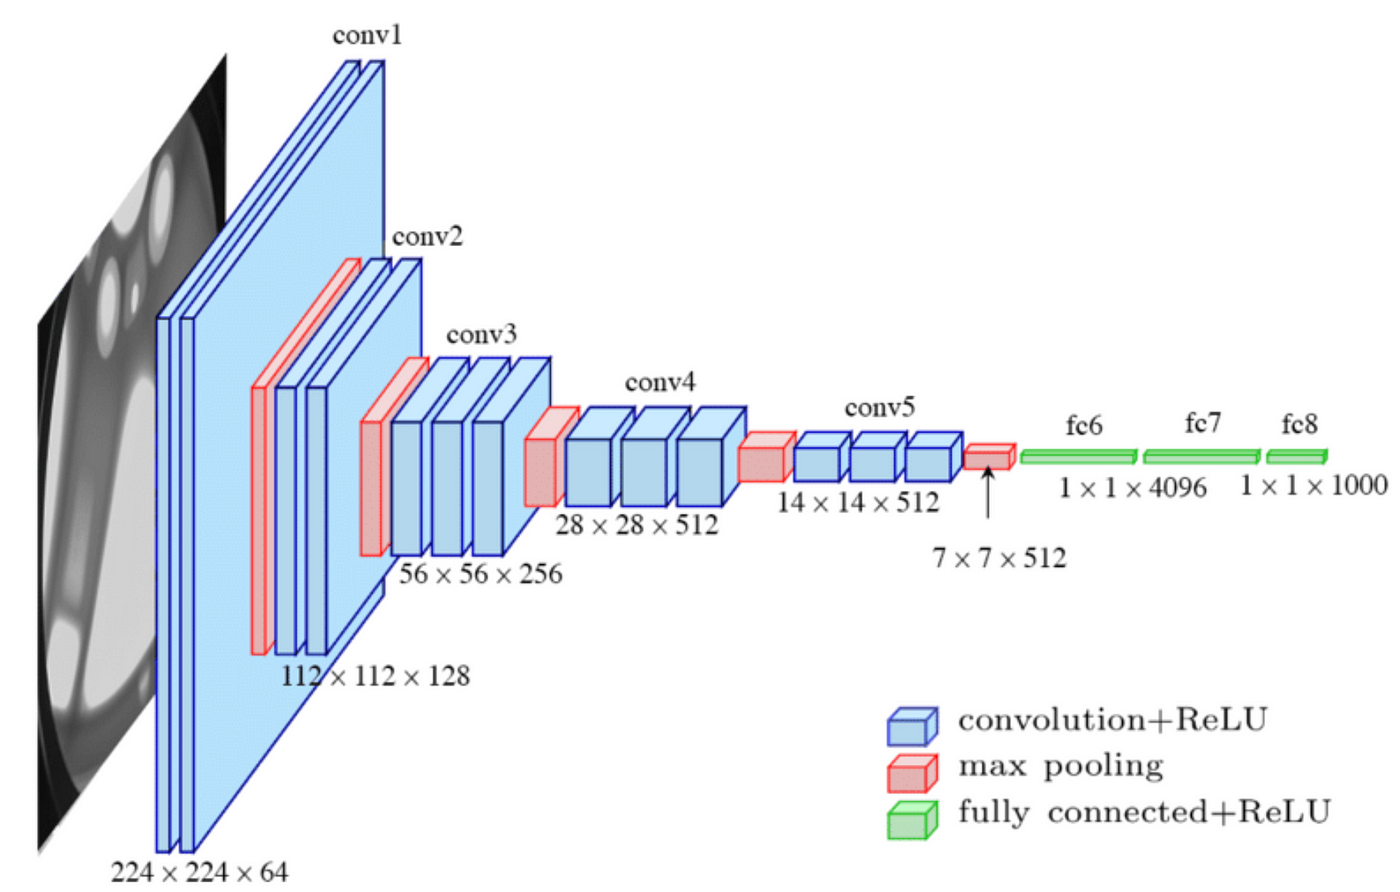

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

dataset_path = "/content/C:/dataset_merged"
vgg_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen_vgg = vgg_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen_vgg = vgg_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

#VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

model_vgg = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#treinamento
history_vgg = model_vgg.fit(
    train_gen_vgg,
    epochs=20,
    validation_data=val_gen_vgg
)


Found 4876 images belonging to 4 classes.
Found 1217 images belonging to 4 classes.
Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.6738 - loss: 8.9941 - val_accuracy: 0.6475 - val_loss: 1.2352
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.7449 - loss: 0.7048 - val_accuracy: 0.6532 - val_loss: 1.5390
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.7629 - loss: 0.6340 - val_accuracy: 0.7149 - val_loss: 1.7763
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.7692 - loss: 0.5902 - val_accuracy: 0.7034 - val_loss: 1.7134
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.7915 - loss: 0.5534 - val_accuracy: 0.6935 - val_loss: 2.3707
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.8045 - loss: 0.4962 - val_accuracy: 0.6952 - val_loss: 2.8452
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8155 - loss: 0.4812 - val_accuracy: 0.7108 - val_loss: 1.9478

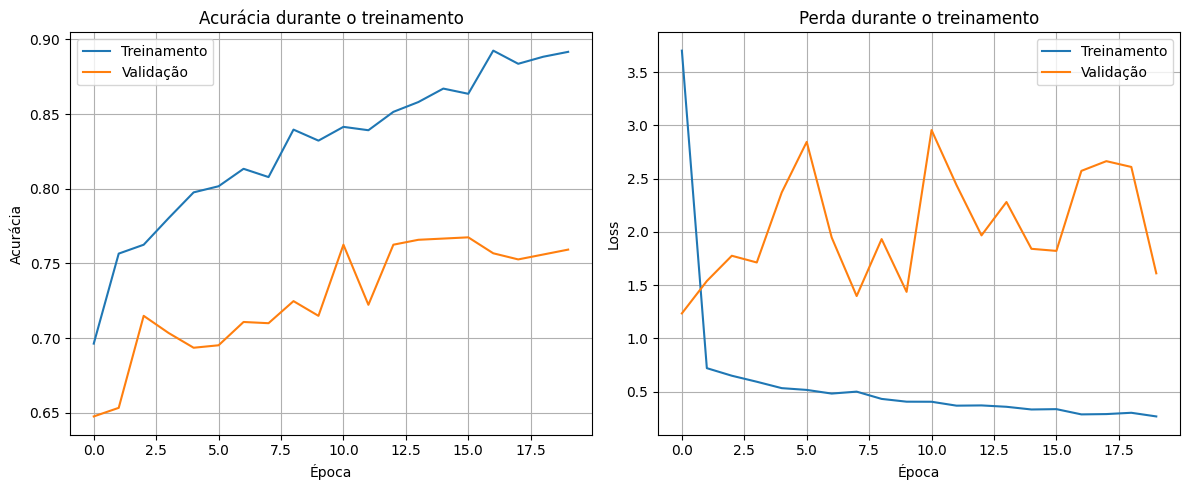

In [ ]:
import matplotlib.pyplot as plt

#acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Treinamento')
plt.plot(history_vgg.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

#perda
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Treinamento')
plt.plot(history_vgg.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step


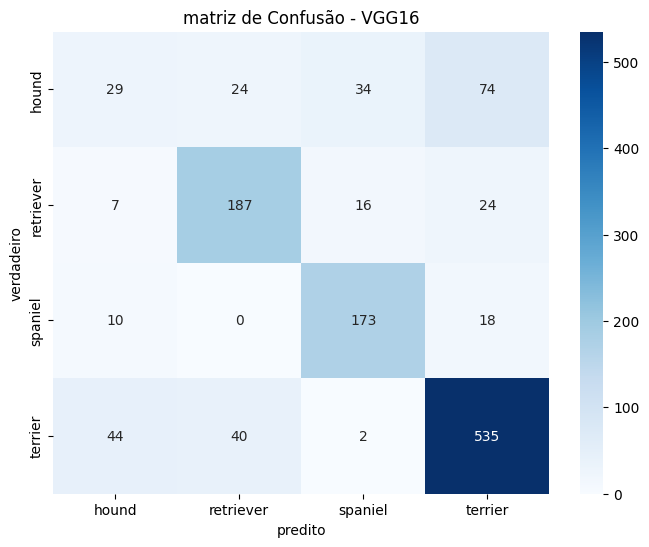

              precision    recall  f1-score   support

       hound       0.32      0.18      0.23       161
   retriever       0.75      0.80      0.77       234
     spaniel       0.77      0.86      0.81       201
     terrier       0.82      0.86      0.84       621

    accuracy                           0.76      1217
   macro avg       0.66      0.68      0.66      1217
weighted avg       0.73      0.76      0.74      1217



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Y_pred = model_vgg.predict(val_gen_vgg)
y_pred = np.argmax(Y_pred, axis=1)

y_true = val_gen_vgg.classes

class_names = list(val_gen_vgg.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('predito')
plt.ylabel('verdadeiro')
plt.title('matriz de Confusão - VGG16')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

Observa-se que a classe terrier teve o melhor desempenho, com 535 classificações corretas, embora ainda tenha sido confundida com outras classes, principalmente hound e retriever (44 e 40). Já a classe hound apresenta maior taxa de erro. Isso indica que o modelo teve dificuldade em distinguir corretamente entre algumas raças, sugerindo que há espaço para melhoria no treinamento ou na qualidade dos dados.

##Acurácia durante o treinamento (gráfico da esquerda)
- A acurácia de treinamento (linha azul) aumenta constantemente, partindo de cerca de 0.67 e chegando a aproximadamente 0.90.

- Já a acurácia de validação (linha laranja) apresenta uma flutuação ao longo das épocas, variando entre 0.64 e 0.76, sem uma tendência clara de crescimento.

O que isso significa:
*   O modelo está aprendendo bem os dados de treinamento, com melhora contínua da acurácia
*   No entanto, o desempenho em validação não acompanha esse crescimento. A acurácia se mantém relativamente estável e inferior à de treino, o que indica overfitting.




 ## Perda durante o treinamento (gráfico da direita)
- A perda de treinamento (linha azul) cai rapidamente nas primeiras épocas, estabilizando-se em torno de 0.25.

- A perda de validação (linha laranja) mostra oscilações e não apresenta uma tendência clara de queda — inclusive aumenta em algumas épocas, atingindo valores acima de 2.5.

O que isso significa:

*   O modelo se ajusta muito bem aos dados de treinamento, o que reforça a ideia de que está memorizando o conjunto.
*   As perdas mais altas e instáveis em validação apontam que o modelo está tendo dificuldade para generalizar para dados não vistos — um sinal clássico de overfitting.

